In [4]:
import torch, dgl
import tensornetwork as tn
import networkx as nx
from tensornet.graph import GraphTensorNetwork
from gnnfp.utils import GraphFPDataset
from IPython.display import HTML, SVG
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
tn.set_default_backend("pytorch")

INFO:rdkit:Enabling RDKit 2020.03.3 jupyter extensions


In [20]:
data_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9.csv')
features_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9/tree.db')
dataset = GraphFPDataset(data_path, features_path)

Processing new graphs


Fait un dictionnaire de fragments en keys et la liste des molécules qui les contiennent en values

In [21]:
fragments = {}
for datum in dataset:
    smile, graph, values, ones = datum
    for idx in range(len(graph.nodes_dict)):
        frag_smiles = graph.nodes_dict[idx]['smiles']
        try:
            fragments[frag_smiles] += [smile]
        except KeyError:
            fragments[frag_smiles] = [smile]

In [22]:
import json
with open('/home/vincent/code/scratch/smiles_frag.txt','w') as f:
    json.dump(fragments, f)

In [23]:
frag_list = list(fragments)
molecules = [Chem.MolFromSmiles(smile) for smile in frag_list]

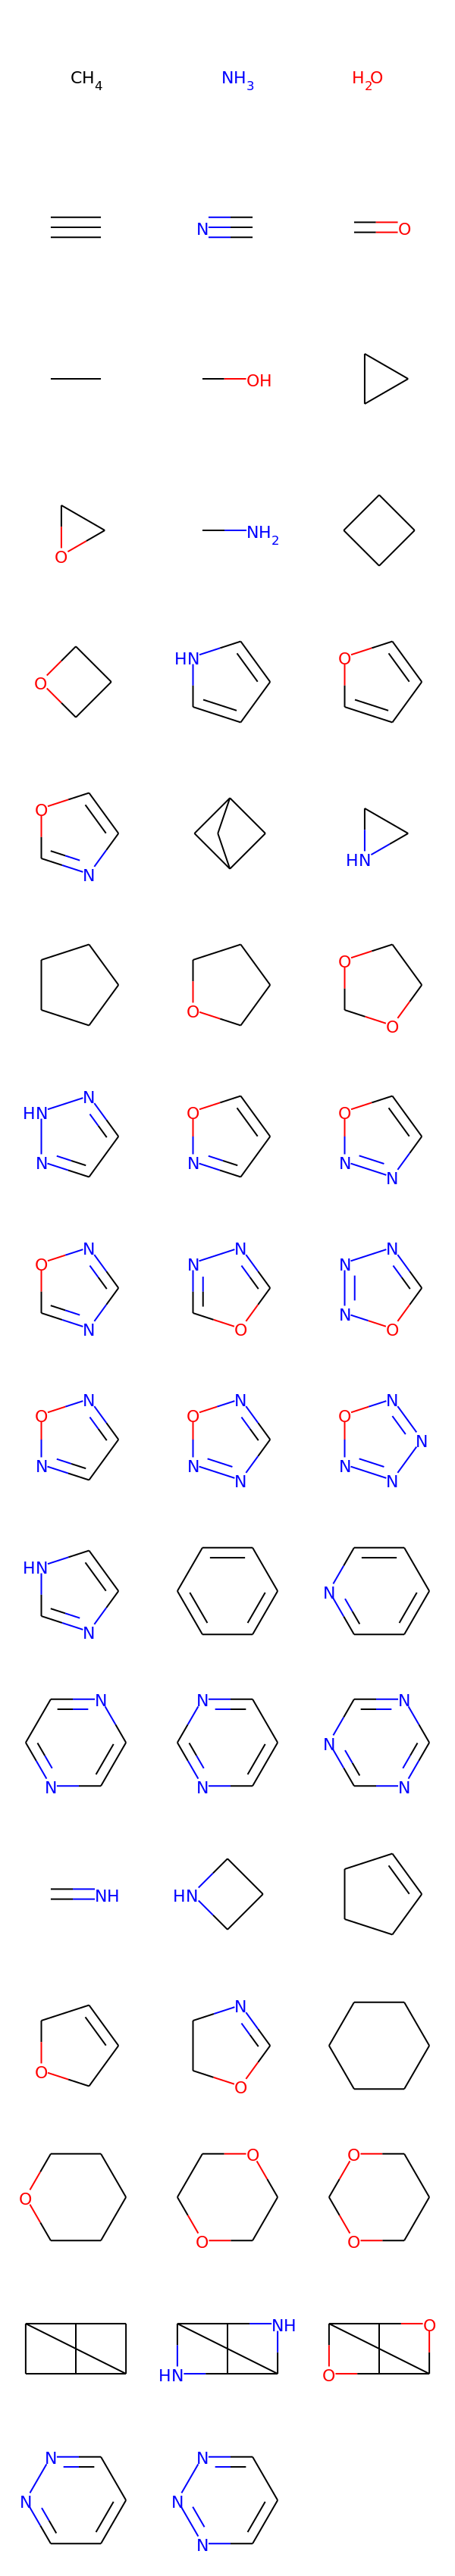

In [24]:
MolsToGridImage(molecules)

In [25]:
MolsToGridImage(fragments['C1CC2C3CC1CC23'])

TypeError: No registered converter was able to extract a C++ pointer to type RDKit::ROMol from this Python object of type str

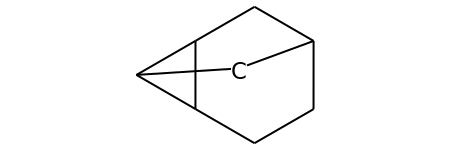

In [26]:
Chem.MolFromSmiles('C1CC2C3CC1CC23')

This computes the max length of the molecular trees in a set

In [27]:
data_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9.csv')
features_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9/tree.db')
dataset = GraphFPDataset(data_path, features_path)

Processing new graphs


In [28]:
length = []
for i in range(dataset.__len__()):
    graph = dataset.__getitem__(i)[1]
    graph = dgl.to_networkx(graph)
    length.append( max(dict(nx.all_pairs_shortest_path_length(graph)).keys()) )
max(length)    

10

Computing the center of the graph

In [29]:
graph = dataset.__getitem__(16)[1]
graph = dgl.to_networkx(graph)
nx.algorithms.distance_measures.center(graph)

[3]

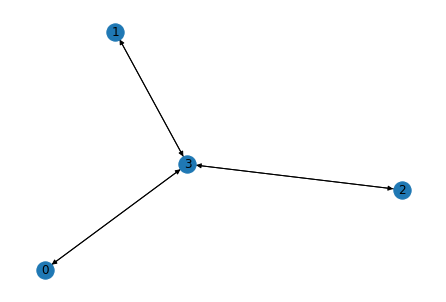

In [30]:
nx.draw(graph, with_labels = True)

161


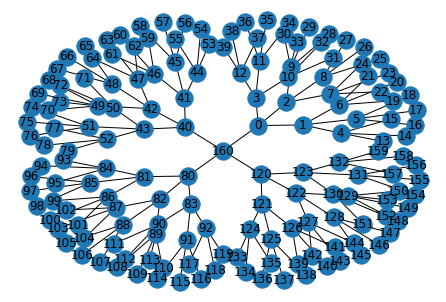

In [31]:
node = nx.Graph()
node.add_node(1)
branch = nx.generators.classic.balanced_tree(3,3)
size = len(branch)
G = nx.disjoint_union(branch, branch)
G = nx.disjoint_union(G, branch)
G = nx.disjoint_union(G, branch)
G.add_edges_from([(0,4*size), (size, 4*size), (2*size,4*size), (3*size,4*size)])
print(len(G))
nx.draw_kamada_kawai(G, with_labels=True)

In [6]:
x = torch.rand(2,2)
X = tn.Node(x)

In [7]:
tn.get_all_dangling(X)

AttributeError: 'Edge' object has no attribute 'get_all_dangling'